In [1]:
import bs4 as bs # Beautiful Soup
import pickle 
import requests

In [2]:
# Request information from Wikipedia by using the web link
resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

# Extract the text using lxml (toolkit to process html and xml using Python)
soup = bs.BeautifulSoup(resp.text, 'lxml')

# Find and extract the particular table that we want
table = soup.find('table', {'class': 'wikitable sortable'})

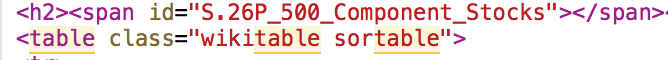

In [3]:
from IPython.display import Image
Image("wikipedia.png")

In [4]:
# Create an empty Python list 
tickers = []

# Iterate through each row in the table and get only the first 70 companies 
for row in table.findAll('tr')[1:501]:
    # Take only the first column (ticker) and convert to text
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)

# Let's check what we have made
print(tickers)
print("Number of tickers: {}".format(len(tickers)))

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AMD', 'AAP', 'AES', 'AET', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'AJG', 'AIZ', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BAX', 'BBT', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BHF', 'BMY', 'AVGO', 'BF.B', 'CHRW', 'CA', 'COG', 'CDNS', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CBS', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'GLW', 'COST', 'COTY', 'CCI', 'CSX', 'CMI

In [5]:
with open("sp500tickers.pickle", "wb") as f:
    pickle.dump(tickers, f)

In [ ]:
# Make some additional imports 
import os # To create our folder 
import pandas_datareader.data as web # API to request our stock data 
import datetime as dt # Specify time frame in a form that Python can process 
import pandas as pd

# Open and read the pickle we have just created 
with open("sp500tickers.pickle", "rb") as f: 
    tickers = pickle.load(f)

# Create a directory to store stock data CSV (if it doesn't exist yet)
if not os.path.exists('stock_dfs'):
    os.makedirs('stock_dfs')
    
# Specify time frame of stock data that we want to pull out 
# We will take approximately one year's worth of data 
start = dt.datetime(2014, 1, 1)
end = dt.datetime.now() # most recent date 

# Iterate through list of ticker symbols and then pull data from API
# (if doesn't exist) create a new file inside specified folder 
for ticker in tickers: 
    # Use an if statement in case connection breaks (save our progress)
    if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
        df = web.DataReader(ticker, 'iex', start, end)
        # Setting date as our index
        df.reset_index(inplace = True)
        df.set_index("Date", inplace = True)
        df.to_csv('stock_dfs/{}.csv'.format(ticker))
    # If data is already present, print on console that it is available
    else:
        print('Already have {}'.format(ticker))

In [9]:
with open("sp500tickers.pickle", "rb") as f:
    tickers = pickle.load(f)

main_df = pd.DataFrame()


for count, ticker in enumerate(tickers):
    df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
    df.set_index('date', inplace = True)

    # Bonus: Adding columns into each stock df while iterating

    # df['{}_HL_pct_diff'.format(ticker)] = (df['high'] - df['low']) / df['low']
    # df['{}_daily_pct_chng'.format(ticker)] = (df['close'] - df['open']) / df['open']

    # In this project we are only interested in the Adj Close 

    df.rename(columns = {'close': ticker}, inplace = True)
    df.drop(['open', 'high', 'low', 'volume'], 1, inplace = True)

    # Build the shared dataframe

    if main_df.empty:
        main_df = df
    else:
        main_df = main_df.join(df, how = 'outer')

    if count % 10 == 0:
        print(count)

print(main_df.head())
main_df.to_csv('sp500_joined_closes.csv')

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
                 MMM      ABT     ABBV   ABMD      ACN     ATVI       AYI  \
date                                                                        
2014-01-02  123.4577  34.5720  44.4942  26.85  73.7326  17.5441  106.1558   
2014-01-03  123.7437  34.9427  44.7681  27.06  73.9780  17.7577  106.6488   
2014-01-06  123.0108  35.4039  43.1331  27.30  73.1964  17.5538  104.8048   
2014-01-07  123.0286  35.1326  43.2187  27.62  74.0871  17.7820  107.9209   
2014-01-08  122.1170  35.4492  43.1075  28.23  74.6596  17.8063  108.5027   

             ADBE   AMD       AAP   ...     WRK       WY       WHR      WMB  \
date                                ...                                       
2014-01-02  59.29  3.95  108.9239   ...     NaN  26.6921  141.1277  30.2376   
2014-01-03  59.16  4.00  112.0405 

In [11]:
import matplotlib.pyplot as plt
from matplotlib import style 
import numpy as np

style.use('ggplot')

           MMM       ABT      ABBV      ABMD       ACN      ATVI       AYI  \
MMM   1.000000  0.833830  0.898231  0.839967  0.941569  0.939128  0.115273   
ABT   0.833830  1.000000  0.945084  0.855299  0.818678  0.808833 -0.176313   
ABBV  0.898231  0.945084  1.000000  0.896297  0.896569  0.870071 -0.095295   
ABMD  0.839967  0.855299  0.896297  1.000000  0.934634  0.910289  0.060554   
ACN   0.941569  0.818678  0.896569  0.934634  1.000000  0.964528  0.229002   

          ADBE       AMD       AAP    ...          WRK        WY       WHR  \
MMM   0.907601  0.834331 -0.479138    ...     0.723545  0.849253  0.514076   
ABT   0.889148  0.607994 -0.471144    ...     0.855558  0.829034  0.374631   
ABBV  0.929470  0.681175 -0.498274    ...     0.797374  0.826301  0.341161   
ABMD  0.968214  0.703714 -0.362027    ...     0.685930  0.748336  0.276588   
ACN   0.947123  0.785783 -0.367445    ...     0.730642  0.768437  0.385398   

           WMB      WLTW      WYNN       XEL       XRX      XL

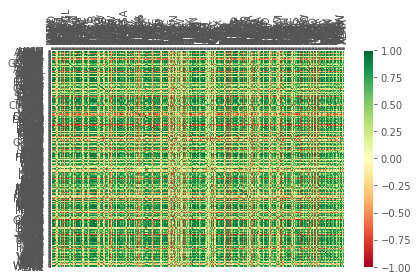

In [12]:
df = pd.read_csv('sp500_joined_closes.csv')

df_corr = df.corr()
print(df_corr.head())
df_corr.to_csv('sp500corr.csv')

data1 = df_corr.values
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

# Create a heatmap color 

heatmap1 = ax1.pcolor(data1, cmap=plt.cm.RdYlGn)
fig1.colorbar(heatmap1)

# Set ticker names so we know which company is which

ax1.set_xticks(np.arange(data1.shape[1]) + 0.5, minor=False)
ax1.set_yticks(np.arange(data1.shape[0]) + 0.5, minor=False)
ax1.invert_yaxis()
ax1.xaxis.tick_top()

# Add company names to the currently nameless ticks

column_labels = df_corr.columns
row_labels = df_corr.index
ax1.set_xticklabels(column_labels)
ax1.set_yticklabels(row_labels)

# Rotate graph 90 degrees

plt.xticks(rotation=90)
heatmap1.set_clim(-1,1)
plt.tight_layout()
plt.savefig("correlations.png", dpi = (300))
plt.show()

In [13]:
def process_data_for_labels(ticker):
    hm_days = 7
    df = pd.read_csv('sp500_joined_closes.csv', index_col=0)
    tickers = df.columns.values.tolist()
    df.fillna(0, inplace=True)

    # Grab the percent returns for the next seven days 

    for i in range(1, hm_days+1):
        df['{}_{}d'.format(ticker, i)] = (df[ticker].shift(-i) - df[ticker]) / df[ticker]
    df.fillna(0, inplace=True)
    return tickers, df

In [14]:
def buy_sell_hold(*args):
    cols = [c for c in args]
    requirement = 0.02
    for col in cols:
        if col > requirement:
            return 1
        if col < -requirement:
            return -1
    return 0

In [15]:
from collections import Counter

# Take any ticker, create the needed dataset, create label column 

def extract_featuresets(ticker):
    tickers, df = process_data_for_labels(ticker)

    df['{}_target'.format(ticker)] = list(map( buy_sell_hold,
                                               df['{}_1d'.format(ticker)],
                                               df['{}_2d'.format(ticker)],
                                               df['{}_3d'.format(ticker)],
                                               df['{}_4d'.format(ticker)],
                                               df['{}_5d'.format(ticker)],
                                               df['{}_6d'.format(ticker)],
                                               df['{}_7d'.format(ticker)]))

    # Distribution 

    vals = df['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    print('Data spread:', Counter(str_vals))

    # Clean up data 

    df.fillna(0, inplace=True)
    df = df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)

    # Convert stock prices to % changes

    df_vals = df[[ticker for ticker in tickers]].pct_change()
    df_vals = df_vals.replace([np.inf, -np.inf], 0)
    df_vals.fillna(0, inplace=True)

    # Features and labels

    X = df_vals.values
    y = df['{}_target'.format(ticker)].values
    return X, y, df


In [31]:
from sklearn import svm, cross_validation, neighbors
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier

def do_ml(ticker):
    X, y, df = extract_featuresets(ticker)

    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25)

    clf = VotingClassifier([('lsvc', svm.LinearSVC()),
                            ('knn', neighbors.KNeighborsClassifier()),
                            ('dtree', DecisionTreeClassifier())])

    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print('accuracy:', confidence)
    predictions = clf.predict(X_test)
    print('predicted class counts:', Counter(predictions))
    print()
    print()
    return confidence

In [35]:
from statistics import mean
import warnings

warnings.filterwarnings(action='ignore', category=DeprecationWarning)

with open("sp500tickers.pickle","rb") as f:
    tickers = pickle.load(f)

accuracies = []

for count,ticker in enumerate(tickers[200:300]):

    if count%10==0:
        print(count)

    accuracy = do_ml(ticker)
    accuracies.append(accuracy)
    print("{} accuracy: {}. Average accuracy:{}".format(ticker,accuracy,mean(accuracies)))

0
Data spread: Counter({'-1': 496, '1': 483, '0': 135})
accuracy: 0.44086021505376344
predicted class counts: Counter({-1: 200, 1: 74, 0: 5})


FLS accuracy: 0.44086021505376344. Average accuracy:0.44086021505376344
Data spread: Counter({'-1': 477, '1': 461, '0': 176})
accuracy: 0.45161290322580644
predicted class counts: Counter({-1: 193, 1: 86})


FLR accuracy: 0.45161290322580644. Average accuracy:0.44623655913978494
Data spread: Counter({'-1': 480, '1': 425, '0': 209})
accuracy: 0.3835125448028674
predicted class counts: Counter({-1: 232, 1: 47})


FMC accuracy: 0.3835125448028674. Average accuracy:0.4253285543608124
Data spread: Counter({'1': 499, '-1': 429, '0': 186})
accuracy: 0.4014336917562724
predicted class counts: Counter({-1: 133, 1: 129, 0: 17})


FL accuracy: 0.4014336917562724. Average accuracy:0.41935483870967744
Data spread: Counter({'1': 432, '-1': 396, '0': 286})
accuracy: 0.34767025089605735
predicted class counts: Counter({-1: 152, 1: 104, 0: 23})


F accuracy: 0.

Data spread: Counter({'0': 552, '1': 325, '-1': 237})
accuracy: 0.5340501792114696
predicted class counts: Counter({0: 219, -1: 42, 1: 18})


HON accuracy: 0.5340501792114696. Average accuracy:0.41729714167410686
40
Data spread: Counter({'1': 446, '0': 349, '-1': 319})
accuracy: 0.35842293906810035
predicted class counts: Counter({1: 108, -1: 107, 0: 64})


HRL accuracy: 0.35842293906810035. Average accuracy:0.41586118551298473
Data spread: Counter({'1': 467, '-1': 383, '0': 264})
accuracy: 0.33691756272401435
predicted class counts: Counter({-1: 147, 1: 111, 0: 21})


HST accuracy: 0.33691756272401435. Average accuracy:0.4139815754465807
Data spread: Counter({'0': 577, '1': 317, '-1': 220})
accuracy: 0.5342960288808665
predicted class counts: Counter({0: 232, -1: 37, 1: 8})


HPQ accuracy: 0.5342960288808665. Average accuracy:0.41677958599156406
Data spread: Counter({'1': 471, '-1': 352, '0': 291})
accuracy: 0.3763440860215054
predicted class counts: Counter({-1: 143, 1: 116, 0: 20})


Data spread: Counter({'1': 557, '-1': 319, '0': 238})
accuracy: 0.4157706093189964
predicted class counts: Counter({1: 163, -1: 93, 0: 23})


KLAC accuracy: 0.4157706093189964. Average accuracy:0.403696294909536
Data spread: Counter({'1': 524, '-1': 463, '0': 127})
accuracy: 0.44086021505376344
predicted class counts: Counter({1: 152, -1: 124, 0: 3})


KSS accuracy: 0.44086021505376344. Average accuracy:0.40416084391133883
80
Data spread: Counter({'0': 628, '-1': 263, '1': 223})
accuracy: 0.5595667870036101
predicted class counts: Counter({0: 256, -1: 17, 1: 4})


KHC accuracy: 0.5595667870036101. Average accuracy:0.4060794358013669
Data spread: Counter({'1': 511, '-1': 374, '0': 229})
accuracy: 0.4014336917562724
predicted class counts: Counter({1: 146, -1: 111, 0: 22})


KR accuracy: 0.4014336917562724. Average accuracy:0.40602278038618284
Data spread: Counter({'1': 509, '-1': 451, '0': 154})
accuracy: 0.5053763440860215
predicted class counts: Counter({-1: 168, 1: 108, 0: 3})


LB a